# 模型选择



In [1]:
import pandas as pd
# read training data 
train_df = pd.read_csv('../data/PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['observed'] = (train_df['cycle'] >= train_df['max'])

import lifelines
from matplotlib import pyplot as plt
max_event = train_df.groupby('id').last()
max_event_censor_1 = train_df[train_df['max']<=250].groupby('id').last()  
max_event_censor_2 = train_df[(train_df['max']>250) & (train_df['cycle']>250)].groupby('id').sample(n=1,random_state=21)

max_event_censor_mix = pd.concat([max_event_censor_1,max_event_censor_2])

## 检查低方差
我们可以使用DataFrame的统计值,筛选出出方差比较大的特征

In [2]:
std_sr = train_df.drop(['cycle','id','max'],axis=1).describe().loc['std'].sort_values(ascending=False)
std_sr

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
Name: std, dtype: float64

In [3]:
list(std_sr.iloc[0:5].index)

['s9', 's14', 's4', 's3', 's17']

In [4]:
from lifelines import CoxPHFitter,WeibullAFTFitter

cph1 = CoxPHFitter(label='cph1')
cph1.fit(df=max_event_censor_mix[list(std_sr.iloc[0:5].index)+['cycle','observed']],duration_col='cycle',
event_col='observed',show_progress=True)


Iteration 1: norm_delta = 6.38160, step_size = 0.9000, log_lik = -334.74516, newton_decrement = 18.64339, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.72041, step_size = 0.2250, log_lik = -327.30228, newton_decrement = 11.11436, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.17610, step_size = 0.2925, log_lik = -321.75042, newton_decrement = 5.60788, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.47860, step_size = 0.4943, log_lik = -317.56902, newton_decrement = 1.49434, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.19772, step_size = 0.8354, log_lik = -316.10438, newton_decrement = 0.05041, seconds_since_start = 0.0
Iteration 6: norm_delta = 0.00148, step_size = 1.0000, log_lik = -316.05371, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 7: norm_delta = 0.00000, step_size = 1.0000, log_lik = -316.05371, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 7 iterations.


<lifelines.CoxPHFitter:"cph1", fitted with 100 total observations, 15 right-censored observations>

In [5]:
cph2 = CoxPHFitter(label='cph1')
cph2.fit(df=max_event_censor_mix[list(std_sr.iloc[0:10].index)+['cycle','observed']],duration_col='cycle',
event_col='observed',show_progress=True)


Iteration 1: norm_delta = 5.71665, step_size = 0.9000, log_lik = -334.74516, newton_decrement = 22.97305, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.00191, step_size = 0.2250, log_lik = -325.54982, newton_decrement = 15.12582, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.64511, step_size = 0.2925, log_lik = -317.94331, newton_decrement = 9.23807, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.31387, step_size = 0.4943, log_lik = -310.88370, newton_decrement = 3.99483, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.28904, step_size = 0.8354, log_lik = -306.64658, newton_decrement = 0.63025, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.01969, step_size = 1.0000, log_lik = -305.96915, newton_decrement = 0.00964, seconds_since_start = 0.1
Iteration 7: norm_delta = 0.00029, step_size = 1.0000, log_lik = -305.95941, newton_decrement = 0.00000, seconds_since_start = 0.1
Iteration 8: norm_delta = 0.00000, step_size = 1.0000, log_lik = -305.95941, newt

<lifelines.CoxPHFitter:"cph1", fitted with 100 total observations, 15 right-censored observations>

In [6]:
cph3 = CoxPHFitter(label='cph1')
cph3.fit(df=max_event_censor_mix[list(std_sr.iloc[0:15].index)+['cycle','observed']],duration_col='cycle',
event_col='observed',show_progress=True)

c:\users\renb\pycharmprojects\survival_analysis\env\lib\site-packages\lifelines\utils\__init__.py:1103: ConvergenceWarning: Column(s) ['setting1'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 6.01272, step_size = 0.9000, log_lik = -334.74516, newton_decrement = 25.55741, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.04988, step_size = 0.2250, log_lik = -324.52332, newton_decrement = 16.59274, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.59220, step_size = 0.2925, log_lik = -316.17691, newton_decrement = 10.30794, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.21098, step_size = 0.4943, log_lik = -308.26647, newton_decrement = 4.92684, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.24620, step_size = 0.8354, log_lik = -302.90321, newton_decrement = 1.21045, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.05263, step_size = 1.0000, log_lik = -301.53899, newton_decrement = 0.05903, seconds_since_start = 0.1
Iteration 7: norm_delta = 0.00335, step_size = 1.0000, log_lik = -301.47827, newton_decrement = 0.00012, seconds_since_start = 0.1
Iteration 8: norm_delta = 0.00001, step_size = 1.0000, log_lik = -301.47815, new

<lifelines.CoxPHFitter:"cph1", fitted with 100 total observations, 15 right-censored observations>

我们已经学了多个模型,现在是时候做出抉择了。

其实对于一般的机器学习，我们会看模型的准确度。对于我们拟合的这个模型，他们同样有评价指标：对数似然。

最大化似然性等同于最大化对数似然性，对数似然也是越大越好。可以看到top 15的那一组会有优势。


In [7]:
cph1_core = cph1.score(max_event_censor_mix[list(std_sr.iloc[0:15].index)+['cycle','observed']])
cph2_core = cph2.score(max_event_censor_mix[list(std_sr.iloc[0:15].index)+['cycle','observed']])
cph3_core = cph3.score(max_event_censor_mix[list(std_sr.iloc[0:15].index)+['cycle','observed']])
print(f'top 5 features, log likehood score is {cph1_core}')
print(f'top 10 features, log likehood score is is {cph2_core}')
print(f'top 15 features, log likehood score is is {cph3_core}')

top 5 features, log likehood score is -3.160537102720856
top 10 features, log likehood score is is -3.059594055530953
top 15 features, log likehood score is is -3.014781496938607


但是，会不会有过拟合的风险呢？ 对于统计来说，主要参考一个指标AIC。
AIC(model)=−2ll+2k

其中k是模型的参数数量（自由度）和ll是最大对数似然。其实，AIC就是在使用尽可能少的参数最大化对数似然之间进行权衡。
AIC_是参数模型的属性，对于 Cox 模型来说,AIC_partial_

In [8]:
print(f'top 5 features, AIC is {cph1.AIC_partial_}')
print(f'top 10 features, AIC is {cph2.AIC_partial_}')
print(f'top 15 features, AIC is {cph3.AIC_partial_}')

top 5 features, AIC is 642.1074205441712
top 10 features, AIC is 631.9188111061906
top 15 features, AIC is 632.9562993877215


我们会选择模型2。
最后，对比三个模型对同一个协变量的表现，发现总自由度（协变量个数）越少，单个协变量的影响越大（越激进）。

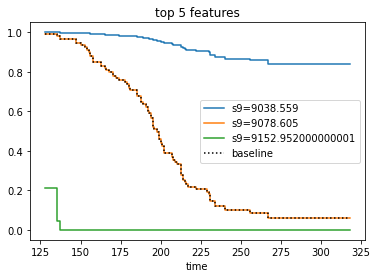

In [12]:
ax = cph1.plot_partial_effects_on_outcome(['s9'], values=max_event_censor_mix[['s9']].quantile([0.1, 0.5,0.8]).values)
plt.xlabel('time')
plt.title('top 5 features')
plt.show()


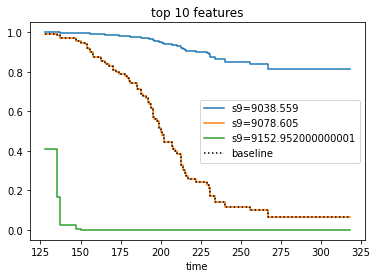

In [13]:
cph2.plot_partial_effects_on_outcome(['s9'], values=max_event_censor_mix[['s9']].quantile([0.1, 0.5,0.8]).values)

plt.xlabel('time')
plt.title('top 10 features')
plt.show()

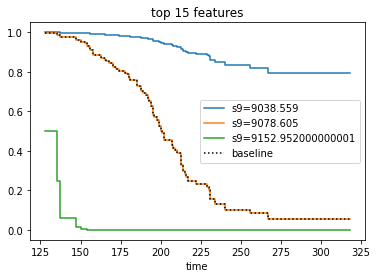

In [14]:
cph3.plot_partial_effects_on_outcome(['s9'], values=max_event_censor_mix[['s9']].quantile([0.1, 0.5,0.8]).values)

plt.xlabel('time')
plt.title('top 15 features')
plt.show()

## 总结

本文介绍了模型协变量（特征)如何通过标准差筛选，以及如何通过AIC选择模型。